In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

In [2]:
data=pd.read_csv('evdataset.csv')
data.head()

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5


In [3]:
corr_matrix = data.corr()
corr_matrix["Electric Range"].sort_values(ascending=False)

Electric Range                 1.000000
Combined - Mild Weather        0.999340
Combined - Cold Weather        0.999298
Highway - Cold Weather         0.999215
Highway - Mild Weather         0.998401
City - Mild Weather            0.998262
City - Cold Weather            0.995611
Battery Capacity               0.863062
Top Speed                      0.706707
Fastcharge Speed               0.701595
Total Power                    0.637401
Total Torque                   0.614073
Charge Speed                   0.415019
Charge Power                   0.398395
Width                          0.277975
Gross Vehicle Weight (GVWR)    0.269258
Length                         0.219826
id                             0.128289
Wheelbase                      0.061227
Cargo Volume                  -0.145220
Max. Payload                  -0.373626
Seats                         -0.500843
Height                        -0.540106
Acceleration 0 - 100 km/h     -0.708172
Name: Electric Range, dtype: float64

In [4]:
data.nunique()

id                             194
Make                            34
link                           194
City - Cold Weather             64
Highway - Cold Weather          52
Combined - Cold Weather         57
City - Mild Weather             82
Highway - Mild Weather          59
Combined - Mild Weather         67
Acceleration 0 - 100 km/h       72
Top Speed                       29
Electric Range                  66
Total Power                     65
Total Torque                    69
Drive                            3
Battery Capacity                49
Charge Power                     5
Charge Speed                    37
Fastcharge Speed                69
Length                          74
Width                           51
Height                          76
Wheelbase                       54
Gross Vehicle Weight (GVWR)    122
Max. Payload                   110
Cargo Volume                    74
Seats                            5
dtype: int64

In [5]:
data.shape

(194, 27)

In [6]:
data.replace({'Drive':{'Rear':2,'Front':0,'AWD':1}},inplace=True)

In [7]:
cols_to_use=['City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather','Combined - Mild Weather','Acceleration 0 - 100 km/h','Top Speed','Electric Range','Total Power','Total Torque','Drive','Battery Capacity','Charge Power','Charge Speed','Fastcharge Speed','Wheelbase','Gross Vehicle Weight (GVWR)','Max. Payload','Cargo Volume','Width','Length']
data=data[cols_to_use]
data.head()

,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,...,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Width,Length
0,390,275,330,575,355,445,7.8,185,390,168,...,77.4,11.0,49,1020,2900,2495,595,432,1890,4515
1,330,235,280,480,300,375,6.2,160,330,215,...,69.7,11.0,46,470,2829,2580,480,495,1834,4684
2,400,305,350,580,385,470,3.2,260,415,500,...,93.4,11.0,46,1020,2900,2880,575,366,1966,4963
3,445,340,390,670,440,540,5.7,190,470,250,...,83.9,11.0,54,730,2856,2605,555,470,1852,4783
4,440,320,380,660,415,520,7.9,160,450,150,...,82.0,11.0,55,570,2771,2300,447,385,1809,4261


In [8]:
data.isna().sum()

City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Wheelbase                      0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Width                          0
Length                         0
dtype: int64

In [9]:
x=data.drop(['Electric Range','City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather',
'Combined - Mild Weather'],axis=1)
y=data[['Electric Range','City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather',
'Combined - Mild Weather']]

In [10]:
x.shape

(194, 15)

In [11]:
t=[[7.8,185,168,350,2,77.4,11,49,1020,2900,2495,595,432,1890,4515]]

In [12]:
x

,Acceleration 0 - 100 km/h,Top Speed,Total Power,Total Torque,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Width,Length
0,7.8,185,168,350,2,77.4,11.0,49,1020,2900,2495,595,432,1890,4515
1,6.2,160,215,520,1,69.7,11.0,46,470,2829,2580,480,495,1834,4684
2,3.2,260,500,850,1,93.4,11.0,46,1020,2900,2880,575,366,1966,4963
3,5.7,190,250,430,2,83.9,11.0,54,730,2856,2605,555,470,1852,4783
4,7.9,160,150,310,2,82.0,11.0,55,570,2771,2300,447,385,1809,4261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2.8,260,560,1050,1,93.4,11.0,45,980,2900,2870,575,366,1966,4963
190,7.9,160,150,310,2,82.0,11.0,55,570,2771,2280,420,385,1809,4261
191,11.7,135,100,260,0,50.0,7.4,27,310,2975,2440,639,806,1921,4753
192,6.2,180,220,460,1,82.0,11.0,49,500,2764,2715,575,535,1865,4588


In [13]:
from sklearn import preprocessing
x=preprocessing.normalize(x)

In [14]:
x

array([[1.22767035e-03, 2.91178223e-02, 2.64421305e-02, ...,
        6.79940499e-02, 2.97473968e-01, 7.10632258e-01],
       [9.68174165e-04, 2.49851397e-02, 3.35737815e-02, ...,
        7.72977761e-02, 2.86392164e-01, 7.31439966e-01],
       [4.63053915e-04, 3.76231306e-02, 7.23521742e-02, ...,
        5.29617915e-02, 2.84488749e-01, 7.18167682e-01],
       ...,
       [1.79811185e-03, 2.07474445e-02, 1.53684774e-02, ...,
        1.23869928e-01, 2.95228450e-01, 7.30463730e-01],
       [9.71750721e-04, 2.82121177e-02, 3.44814772e-02, ...,
        8.38526832e-02, 2.92308886e-01, 7.19095533e-01],
       [2.01783837e-03, 1.83439852e-02, 1.41107578e-02, ...,
        8.50878696e-02, 2.70926550e-01, 6.99329157e-01]])

In [15]:
y

,Electric Range,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather
0,390,390,275,330,575,355,445
1,330,330,235,280,480,300,375
2,415,400,305,350,580,385,470
3,470,445,340,390,670,440,540
4,450,440,320,380,660,415,520
...,...,...,...,...,...,...,...
189,400,390,290,340,560,370,450
190,450,440,320,380,660,415,515
191,195,210,140,170,295,170,220
192,400,395,290,340,580,370,460


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train,Y_train)

In [18]:
reg.score(X_test,Y_test)

0.9805745833533298

In [19]:
reg.score(X_train,Y_train)

0.9843184091599759

In [20]:

from sklearn import preprocessing
a=preprocessing.normalize(t)

In [21]:
reg.predict(a)

array([[380.28113434, 378.74301932, 270.38616099, 322.98829483,
        556.15109589, 346.08700397, 432.62126731]])

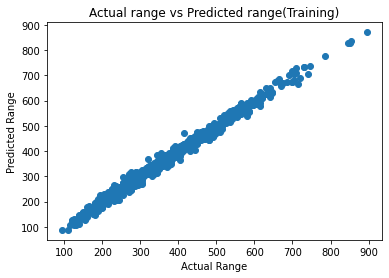

In [22]:
training_data_prediction=reg.predict(X_train)
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Training)")
plt.show()

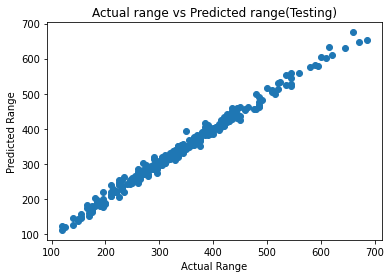

In [23]:
testing_data_prediction=reg.predict(X_test)
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing)")
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=15),
}

forest_reg=RandomForestRegressor(random_state=42)
rnd_search=RandomizedSearchCV(forest_reg,param_distributions=param_distribs,n_iter=10,cv=5,scoring="neg_mean_squared_error",
                              random_state=42)
rnd_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000248EBFF4198>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000248EC0A86D8>},
                   random_state=42, scoring='neg_mean_squared_error')

In [25]:
rnd_search.score(X_train,Y_train)

-82.91021007566704

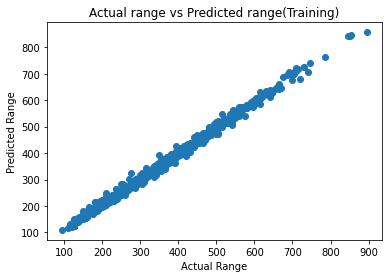

In [26]:
training_data_prediction1=rnd_search.predict(X_train)
plt.scatter(Y_train,training_data_prediction1)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Training)")
plt.show()

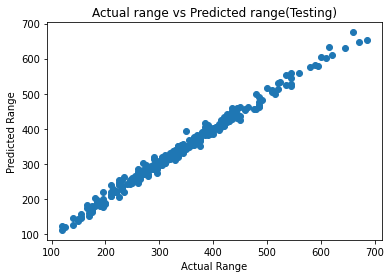

In [27]:
testing_data_prediction1=reg.predict(X_test)
plt.scatter(Y_test,testing_data_prediction1)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing)")
plt.show()

In [28]:
rnd_search.predict(a)

array([[388.83333333, 387.66666667, 275.25      , 329.38888889,
        570.77777778, 354.47222222, 443.72222222]])

In [29]:
from sklearn import metrics 

print('Mean Absolute Error:',metrics.mean_absolute_error(Y_train,training_data_prediction1))
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,testing_data_prediction1))
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_train,training_data_prediction))
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,testing_data_prediction))

Mean Absolute Error: 5.883691756272403
Mean Absolute Error: 9.104884638191969
Mean Absolute Error: 10.30974781251362
Mean Absolute Error: 9.104884638191969
